Loading and Exploring Flight Dataset
1.Importing the necessary libraries
2.Getting the data and saving it in a dataframe'flight_data'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
flight_new=pd.read_csv("C:/Users/User/Downloads/2018.csv/2018.csv")

records_size = 30000  

# Sample a random subset of rows to achieve the desired
flight_data= flight_new.sample(n=records_size, random_state=42)  # Set random_state for reproducibility
flight_data.head()


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
3847197,2018-07-16,EV,4371,HSV,IAH,646,643.0,-3.0,13.0,656.0,...,112.0,106.0,86.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN
5562257,2018-10-08,UA,1597,SFO,LAX,2000,1955.0,-5.0,20.0,2015.0,...,98.0,87.0,51.0,337.0,NaN,NaN,NaN,NaN,NaN,NaN
3008267,2018-06-05,AA,356,CLT,ORD,1130,1138.0,8.0,25.0,1203.0,...,136.0,131.0,94.0,599.0,NaN,NaN,NaN,NaN,NaN,NaN
4927430,2018-09-06,AA,958,AUS,LAX,1848,1838.0,-10.0,19.0,1857.0,...,194.0,194.0,162.0,1242.0,NaN,NaN,NaN,NaN,NaN,NaN
5846424,2018-10-22,DL,1790,ATL,SAT,1153,1150.0,-3.0,8.0,1158.0,...,154.0,136.0,126.0,874.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Retreiving the information of the dataframe
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 3847197 to 4695878
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FL_DATE              30000 non-null  object 
 1   OP_CARRIER           30000 non-null  object 
 2   OP_CARRIER_FL_NUM    30000 non-null  int64  
 3   ORIGIN               30000 non-null  object 
 4   DEST                 30000 non-null  object 
 5   CRS_DEP_TIME         30000 non-null  int64  
 6   DEP_TIME             29528 non-null  float64
 7   DEP_DELAY            29506 non-null  float64
 8   TAXI_OUT             29513 non-null  float64
 9   WHEELS_OFF           29513 non-null  float64
 10  WHEELS_ON            29501 non-null  float64
 11  TAXI_IN              29501 non-null  float64
 12  CRS_ARR_TIME         30000 non-null  int64  
 13  ARR_TIME             29501 non-null  float64
 14  ARR_DELAY            29425 non-null  float64
 15  CANCELLED            30000 n

In [4]:
#Getting the column names of the dataframe
flight_data.columns


Index(['FL_DATE', 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 27'],
      dtype='object')

In [5]:
#Converting the datatype of the FL_DATE field to datetime datatype
flight_data['FL_DATE']=pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d %H:%M:%S')


In [6]:
#Checking the null values in the dataframe
total_null_values = flight_data.isnull().sum()
print(total_null_values)

FL_DATE                    0
OP_CARRIER                 0
OP_CARRIER_FL_NUM          0
ORIGIN                     0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 472
DEP_DELAY                494
TAXI_OUT                 487
WHEELS_OFF               487
WHEELS_ON                499
TAXI_IN                  499
CRS_ARR_TIME               0
ARR_TIME                 499
ARR_DELAY                575
CANCELLED                  0
CANCELLATION_CODE      29511
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      564
AIR_TIME                 564
DISTANCE                   0
CARRIER_DELAY          24353
WEATHER_DELAY          24353
NAS_DELAY              24353
SECURITY_DELAY         24353
LATE_AIRCRAFT_DELAY    24353
Unnamed: 27            30000
dtype: int64


In [7]:
#deleting the columns of no meaning and maximum number of null values
columns_to_delete = ['CANCELLATION_CODE', 'Unnamed: 27','TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN','CANCELLED']
flight_data = flight_data.drop(columns=columns_to_delete)
flight_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 3847197 to 4695878
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              30000 non-null  datetime64[ns]
 1   OP_CARRIER           30000 non-null  object        
 2   OP_CARRIER_FL_NUM    30000 non-null  int64         
 3   ORIGIN               30000 non-null  object        
 4   DEST                 30000 non-null  object        
 5   CRS_DEP_TIME         30000 non-null  int64         
 6   DEP_TIME             29528 non-null  float64       
 7   DEP_DELAY            29506 non-null  float64       
 8   CRS_ARR_TIME         30000 non-null  int64         
 9   ARR_TIME             29501 non-null  float64       
 10  ARR_DELAY            29425 non-null  float64       
 11  DIVERTED             30000 non-null  float64       
 12  CRS_ELAPSED_TIME     30000 non-null  float64       
 13  ACTUAL_ELAPSED_TIME  29

In [8]:
flight_data.dropna(inplace=True)

In [9]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 761662 to 3082499
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              5644 non-null   datetime64[ns]
 1   OP_CARRIER           5644 non-null   object        
 2   OP_CARRIER_FL_NUM    5644 non-null   int64         
 3   ORIGIN               5644 non-null   object        
 4   DEST                 5644 non-null   object        
 5   CRS_DEP_TIME         5644 non-null   int64         
 6   DEP_TIME             5644 non-null   float64       
 7   DEP_DELAY            5644 non-null   float64       
 8   CRS_ARR_TIME         5644 non-null   int64         
 9   ARR_TIME             5644 non-null   float64       
 10  ARR_DELAY            5644 non-null   float64       
 11  DIVERTED             5644 non-null   float64       
 12  CRS_ELAPSED_TIME     5644 non-null   float64       
 13  ACTUAL_ELAPSED_TIME  5644

In [10]:
#Retrieving the unique values in the OP_CARRIER column

unique_values = flight_data['OP_CARRIER'].unique()
print(unique_values)

['WN' 'EV' 'AA' 'AS' 'F9' 'MQ' 'DL' 'OO' 'G4' 'UA' 'YX' 'YV' 'B6' '9E'
 'OH' 'HA' 'NK' 'VX']


In [12]:
#Creating a dictionary for replacing the values in the OP_CARRIER column
replacement_dict = {'OP_CARRIER': {'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'}}

flight_data.replace(replacement_dict, inplace=True)


In [13]:
flight_data.head(10)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
761662,2018-02-11,Southwest Airlines,4785,RNO,PHX,1430,1452.0,22.0,1710,1732.0,...,0.0,100.0,100.0,80.0,601.0,12.0,0.0,0.0,0.0,10.0
2021536,2018-04-17,ExpressJet,4252,BTV,EWR,1330,1400.0,30.0,1505,1521.0,...,0.0,95.0,81.0,49.0,266.0,0.0,0.0,16.0,0.0,0.0
6206784,2018-11-09,Southwest Airlines,2904,SJC,SNA,1840,1927.0,47.0,1955,2037.0,...,0.0,75.0,70.0,53.0,342.0,7.0,0.0,0.0,0.0,35.0
6074595,2018-11-03,American Airlines,2360,DFW,LAX,1905,1959.0,54.0,2023,2141.0,...,0.0,198.0,222.0,179.0,1235.0,54.0,0.0,24.0,0.0,0.0
7015060,2018-12-21,Alaska Airlines,836,LIH,PDX,1315,1309.0,-6.0,2039,2058.0,...,0.0,324.0,349.0,328.0,2631.0,0.0,0.0,19.0,0.0,0.0
4544383,2018-08-17,American Airlines,1767,TPA,PHL,1703,1707.0,4.0,1943,2011.0,...,0.0,160.0,184.0,131.0,920.0,0.0,0.0,28.0,0.0,0.0
3414217,2018-06-25,Frontier Airlines,381,DEN,ELP,1052,1138.0,46.0,1241,1322.0,...,0.0,109.0,104.0,75.0,563.0,41.0,0.0,0.0,0.0,0.0
5394160,2018-09-29,Envoy Air,3649,PVD,ORD,1637,1627.0,-10.0,1817,1834.0,...,0.0,160.0,187.0,141.0,849.0,0.0,0.0,17.0,0.0,0.0
7007019,2018-12-21,Southwest Airlines,6416,LGA,HOU,1130,1243.0,73.0,1455,1514.0,...,0.0,265.0,211.0,193.0,1428.0,0.0,0.0,0.0,0.0,19.0
181933,2018-01-10,American Airlines,1524,DFW,SAT,1625,1650.0,25.0,1733,1754.0,...,0.0,68.0,64.0,49.0,247.0,11.0,0.0,0.0,0.0,10.0


In [14]:
#Getting the airport data and saving it in a dataframe 'airport_data'
airport_data=pd.read_csv("C:/Users/User/Downloads/airports.csv")
airport_data.head()

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque


In [15]:
#Getting the unique values in ORIGIN field
flight_data['ORIGIN'].unique()

array(['RNO', 'BTV', 'SJC', 'DFW', 'LIH', 'TPA', 'DEN', 'PVD', 'LGA',
       'LAX', 'ATL', 'EWR', 'SFB', 'MIA', 'FLL', 'ORD', 'SFO', 'BUR',
       'RDU', 'DCA', 'TUS', 'BOS', 'TUL', 'MSP', 'AUS', 'PHX', 'LAS',
       'MDW', 'XNA', 'CLT', 'MSY', 'JFK', 'PHL', 'MEM', 'HPN', 'ORF',
       'IAH', 'SAT', 'DTW', 'SAN', 'SAV', 'APN', 'DAL', 'PSP', 'SLC',
       'HOU', 'MKE', 'FAT', 'CVG', 'PDX', 'ALB', 'JAN', 'TYS', 'SNA',
       'MQT', 'SJU', 'MAF', 'RST', 'ROC', 'SEA', 'BWI', 'STL', 'MLI',
       'ICT', 'BNA', 'ELM', 'ABE', 'HNL', 'CLE', 'GSP', 'JAX', 'MCI',
       'GEG', 'LIT', 'CHS', 'SMF', 'MCO', 'ANC', 'OGG', 'VPS', 'CAE',
       'BHM', 'RSW', 'GPT', 'SHV', 'CHA', 'CID', 'SDF', 'JNU', 'HRL',
       'IAD', 'CAK', 'IND', 'OKC', 'DHN', 'MSN', 'ONT', 'EUG', 'ABQ',
       'AMA', 'BUF', 'BZN', 'ISP', 'PBI', 'PIH', 'ABI', 'BQN', 'GRI',
       'LGB', 'MDT', 'MTJ', 'OMA', 'CSG', 'ASE', 'SYR', 'FWA', 'PIT',
       'OAK', 'BDL', 'BIL', 'LWS', 'AVP', 'MYR', 'UIN', 'HTS', 'MHT',
       'DAY', 'TYR',

In [17]:
#Getting the unique values in DEST field
flight_data['DEST'].unique()

array(['PHX', 'EWR', 'SNA', 'LAX', 'PDX', 'PHL', 'ELP', 'ORD', 'HOU',
       'SAT', 'MSP', 'JFK', 'LGA', 'DTW', 'AVL', 'MDW', 'SFO', 'SAN',
       'SEA', 'DEN', 'AUS', 'SBP', 'BWI', 'DSM', 'MIA', 'IAH', 'MCO',
       'LAS', 'SMF', 'OAK', 'DFW', 'OMA', 'TPA', 'ATL', 'MEM', 'BDL',
       'BGR', 'DCA', 'RDU', 'ICT', 'FLL', 'FCA', 'LSE', 'TYS', 'SHV',
       'SJC', 'IND', 'MSY', 'SLC', 'TUS', 'CVG', 'CLT', 'STL', 'BUR',
       'MKE', 'JAX', 'CHS', 'IAD', 'OGG', 'MDT', 'BOS', 'BUF', 'ABQ',
       'DAY', 'SDF', 'DAL', 'ALB', 'SFB', 'HNL', 'ANC', 'FAY', 'ROC',
       'LEX', 'MSO', 'ISP', 'CLE', 'SLN', 'MFR', 'ORF', 'CMH', 'GEG',
       'SGF', 'GRR', 'SWO', 'RIC', 'OKC', 'CRW', 'ADQ', 'LIH', 'JAC',
       'CID', 'CLL', 'GRI', 'CAK', 'SAV', 'MOB', 'BQN', 'TLH', 'PBI',
       'BHM', 'ONT', 'CRP', 'FSM', 'BNA', 'BGM', 'SBN', 'PVD', 'VPS',
       'RSW', 'HVN', 'HPN', 'SPS', 'MCI', 'MHT', 'SBA', 'SJU', 'ABI',
       'BTV', 'LBB', 'CMI', 'RNO', 'GCC', 'PIT', 'EUG', 'FSD', 'HLN',
       'BOI', 'OTH',

In [18]:
# Creating a pandas Series using the 'AIRPORT' column as values
# and 'IATA_CODE' column as the index from the airport_data DataFrame
airport_dict=pd.Series(airport_data.AIRPORT.values,index=airport_data.IATA_CODE).to_dict()
print(airport_dict)

{'AZA': 'Phoenix-Mesa Gateway Airport', 'BKG': 'Branson Airport', 'ABE': 'Lehigh Valley International Airport', 'ABI': 'Abilene Regional Airport', 'ABQ': 'Albuquerque International Sunport', 'ABR': 'Aberdeen Regional Airport', 'ABY': 'Southwest Georgia Regional Airport', 'ACK': 'Nantucket Memorial Airport', 'ACT': 'Waco Regional Airport', 'ACV': 'Arcata Airport', 'ACY': 'Atlantic City International Airport', 'ADK': 'Adak Airport', 'ADQ': 'Kodiak Airport', 'AEX': 'Alexandria International Airport', 'AGS': 'Augusta Regional AirportÂ\xa0(Bush Field)', 'AKN': 'King Salmon Airport', 'ALB': 'Albany International Airport', 'ALO': 'Waterloo Regional Airport', 'AMA': 'Rick Husband Amarillo International Airport', 'ANC': 'Ted Stevens Anchorage International Airport', 'APN': 'Alpena County Regional Airport', 'ASE': 'Aspen-Pitkin County Airport', 'ATL': 'Hartsfield-Jackson Atlanta International Airport', 'ATW': 'Appleton International Airport', 'AUS': 'Austin-Bergstrom International Airport', 'AVL

In [19]:
# Converting the Series to a Python dictionary using the to_dict() method
flight_data["ORIGIN"].replace(airport_dict,inplace=True)
flight_data["DEST"].replace(airport_dict,inplace=True)

In [20]:
flight_data.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
761662,2018-02-11,Southwest Airlines,4785,Reno/Tahoe International Airport,Phoenix Sky Harbor International Airport,1430,1452.0,22.0,1710,1732.0,...,0.0,100.0,100.0,80.0,601.0,12.0,0.0,0.0,0.0,10.0
2021536,2018-04-17,ExpressJet,4252,Burlington International Airport,Newark Liberty International Airport,1330,1400.0,30.0,1505,1521.0,...,0.0,95.0,81.0,49.0,266.0,0.0,0.0,16.0,0.0,0.0
6206784,2018-11-09,Southwest Airlines,2904,Norman Y. Mineta San JosÃ© International Airport,John Wayne AirportÂ (Orange County Airport),1840,1927.0,47.0,1955,2037.0,...,0.0,75.0,70.0,53.0,342.0,7.0,0.0,0.0,0.0,35.0
6074595,2018-11-03,American Airlines,2360,Dallas/Fort Worth International Airport,Los Angeles International Airport,1905,1959.0,54.0,2023,2141.0,...,0.0,198.0,222.0,179.0,1235.0,54.0,0.0,24.0,0.0,0.0
7015060,2018-12-21,Alaska Airlines,836,Lihue Airport,Portland International Airport,1315,1309.0,-6.0,2039,2058.0,...,0.0,324.0,349.0,328.0,2631.0,0.0,0.0,19.0,0.0,0.0


In [21]:

flight_data['ARR_DELAY']


761662      22.0
2021536     16.0
6206784     42.0
6074595     78.0
7015060     19.0
           ...  
5161098     20.0
1934831    130.0
7124026     33.0
5345896     18.0
3082499     15.0
Name: ARR_DELAY, Length: 5644, dtype: float64

In [23]:
# Creating an empty list to store flight status values

# Iterating through each value in the 'ARR_DELAY' column of the flight_data DataFrame

# Creating a new column 'FLIGHT_STATUS' in the flight_data DataFrame
# and populate it with the values from the 'status' list

# Displaying the first 5 rows of the modified DataFrame

status=[]
for value in flight_data['ARR_DELAY']:
    if value<20:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS']=status
flight_data.head(5)

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS
761662,2018-02-11,Southwest Airlines,4785,Reno/Tahoe International Airport,Phoenix Sky Harbor International Airport,1430,1452.0,22.0,1710,1732.0,...,100.0,100.0,80.0,601.0,12.0,0.0,0.0,0.0,10.0,1
2021536,2018-04-17,ExpressJet,4252,Burlington International Airport,Newark Liberty International Airport,1330,1400.0,30.0,1505,1521.0,...,95.0,81.0,49.0,266.0,0.0,0.0,16.0,0.0,0.0,0
6206784,2018-11-09,Southwest Airlines,2904,Norman Y. Mineta San JosÃ© International Airport,John Wayne AirportÂ (Orange County Airport),1840,1927.0,47.0,1955,2037.0,...,75.0,70.0,53.0,342.0,7.0,0.0,0.0,0.0,35.0,1
6074595,2018-11-03,American Airlines,2360,Dallas/Fort Worth International Airport,Los Angeles International Airport,1905,1959.0,54.0,2023,2141.0,...,198.0,222.0,179.0,1235.0,54.0,0.0,24.0,0.0,0.0,1
7015060,2018-12-21,Alaska Airlines,836,Lihue Airport,Portland International Airport,1315,1309.0,-6.0,2039,2058.0,...,324.0,349.0,328.0,2631.0,0.0,0.0,19.0,0.0,0.0,0


In [24]:
# creating a Series containing the counts of unique values, where each unique value is a category indicating whether a flight is on time (0) or delayed (1).
flight_data['FLIGHT_STATUS'].value_counts()

1    4746
0     898
Name: FLIGHT_STATUS, dtype: int64

In [25]:
dtype_change=[ 'OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST']
flight_data[dtype_change]=flight_data[dtype_change].astype('category')
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 761662 to 3082499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              5644 non-null   datetime64[ns]
 1   OP_CARRIER           5644 non-null   category      
 2   OP_CARRIER_FL_NUM    5644 non-null   category      
 3   ORIGIN               5644 non-null   category      
 4   DEST                 5644 non-null   category      
 5   CRS_DEP_TIME         5644 non-null   int64         
 6   DEP_TIME             5644 non-null   float64       
 7   DEP_DELAY            5644 non-null   float64       
 8   CRS_ARR_TIME         5644 non-null   int64         
 9   ARR_TIME             5644 non-null   float64       
 10  ARR_DELAY            5644 non-null   float64       
 11  DIVERTED             5644 non-null   float64       
 12  CRS_ELAPSED_TIME     5644 non-null   float64       
 13  ACTUAL_ELAPSED_TIME  5644

In [26]:
flight_data.describe()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FLIGHT_STATUS
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,1466.699327,1521.922395,58.653260,1607.489192,1562.360737,63.737597,0.0,143.351878,148.436215,116.524805,816.479624,18.395641,3.364989,16.376860,0.162828,25.437279,0.840893
std,462.767706,499.388372,80.125801,523.026615,626.138590,76.970356,0.0,73.578365,77.118866,73.494484,597.453347,54.197141,31.449078,34.736494,4.606611,48.996611,0.365808
min,5.000000,1.000000,-21.000000,1.000000,1.000000,15.000000,0.0,34.000000,27.000000,15.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1120.000000,1153.000000,16.000000,1253.000000,1228.000000,23.000000,0.0,90.000000,93.000000,63.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1520.000000,1602.500000,37.000000,1710.000000,1722.000000,38.000000,0.0,124.000000,130.000000,97.000000,650.500000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000
75%,1832.000000,1926.000000,74.250000,2029.000000,2046.000000,76.000000,0.0,172.000000,182.000000,147.000000,1044.250000,16.000000,0.000000,20.000000,0.000000,30.000000,1.000000
max,2359.000000,2400.000000,1432.000000,2359.000000,2400.000000,1444.000000,0.0,620.000000,643.000000,619.000000,4502.000000,1432.000000,1196.000000,844.000000,227.000000,841.000000,1.000000


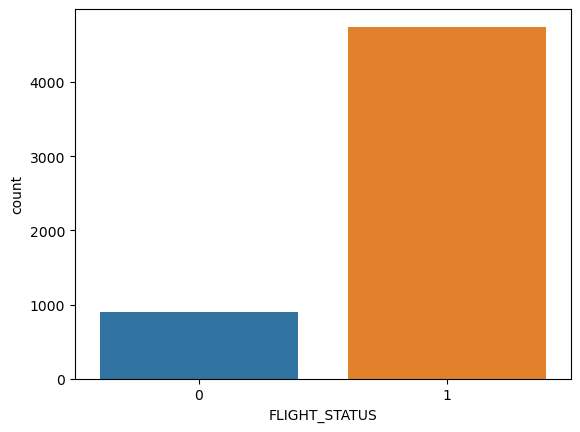

In [27]:
# Creating a countplot using Seaborn representing  flight statuses
sns.countplot(x='FLIGHT_STATUS',data=flight_data)
plt.show()

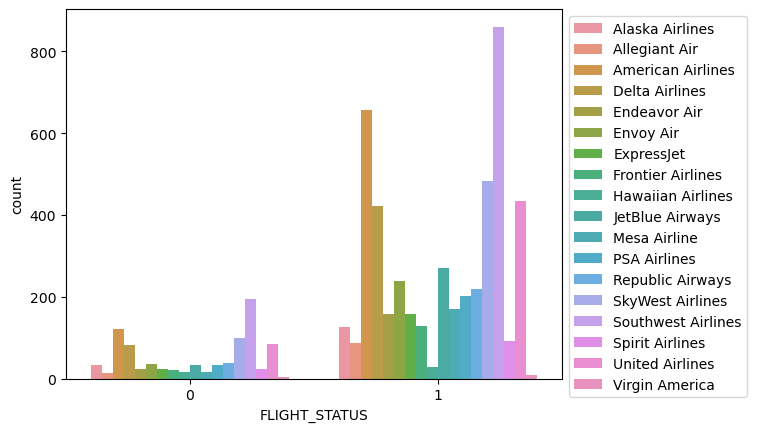

In [28]:
# Creating a countplot with different colors for each 'OP_CARRIER'
sns.countplot(x='FLIGHT_STATUS', data=flight_data, hue='OP_CARRIER')
# Adding a legend to the plot, placing it outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# displaying the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17260\3331797537.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flight_data.corr())


<Axes: >

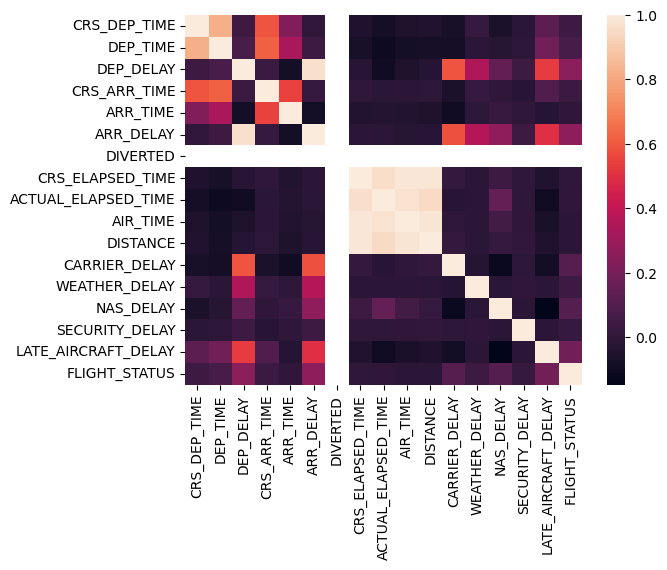

In [29]:
# Creating a heatmap of the correlation matrix
sns.heatmap(flight_data.corr())

In [30]:
# Creating dummy variables for the 'OP_CARRIER' column
dumm_columns=pd.get_dummies(flight_data['OP_CARRIER'])
print(dumm_columns)

         Alaska Airlines  Allegiant Air  American Airlines  Delta Airlines  \
761662                 0              0                  0               0   
2021536                0              0                  0               0   
6206784                0              0                  0               0   
6074595                0              0                  1               0   
7015060                1              0                  0               0   
...                  ...            ...                ...             ...   
5161098                0              0                  1               0   
1934831                0              0                  1               0   
7124026                0              0                  1               0   
5345896                1              0                  0               0   
3082499                0              0                  0               1   

         Endeavor Air  Envoy Air  ExpressJet  Frontier Airlines

In [45]:
# Defining a list of column names to drop from the DataFrame
columns_to_drop = ['OP_CARRIER', 'FL_DATE', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST','ARR_DELAY','DIVERTED']
# Using the drop method to remove the specified columns from the DataFrame
remo_cate = flight_data.drop(columns=columns_to_drop)
# Creating a new DataFrame 'num_col' containing the remaining columns
num_col = pd.DataFrame(remo_cate)


In [46]:
# Concatenating 'num_col' and 'dumm_columns' along the columns (axis=1)
flight_data1=pd.concat([num_col,dumm_columns],axis=1)
flight_data1.head()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,...,Hawaiian Airlines,JetBlue Airways,Mesa Airline,PSA Airlines,Republic Airways,SkyWest Airlines,Southwest Airlines,Spirit Airlines,United Airlines,Virgin America
761662,1430,1452.0,22.0,1710,1732.0,100.0,100.0,80.0,601.0,12.0,...,0,0,0,0,0,0,1,0,0,0
2021536,1330,1400.0,30.0,1505,1521.0,95.0,81.0,49.0,266.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6206784,1840,1927.0,47.0,1955,2037.0,75.0,70.0,53.0,342.0,7.0,...,0,0,0,0,0,0,1,0,0,0
6074595,1905,1959.0,54.0,2023,2141.0,198.0,222.0,179.0,1235.0,54.0,...,0,0,0,0,0,0,0,0,0,0
7015060,1315,1309.0,-6.0,2039,2058.0,324.0,349.0,328.0,2631.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Defining a function 'normalise' to normalize a DataFrame along each column
# Normalizing the DataFrame by subtracting the mean and dividing by the standard deviation
def normalise(x):
    return(x-np.mean(x,axis=0))/np.std(x,axis=0,ddof=1)
normalised_data=normalise(flight_data1)
normalised_data.head()

,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,...,Hawaiian Airlines,JetBlue Airways,Mesa Airline,PSA Airlines,Republic Airways,SkyWest Airlines,Southwest Airlines,Spirit Airlines,United Airlines,Virgin America
761662,-0.079304,-0.140016,-0.457446,0.195995,0.270929,-0.589193,-0.628072,-0.496973,-0.360664,-0.118007,...,-0.089642,-0.238577,-0.184587,-0.208419,-0.218401,-0.339373,2.086640,-0.144207,-0.317861,-0.048044
2021536,-0.295395,-0.244143,-0.357603,-0.195954,-0.066057,-0.657148,-0.874445,-0.918774,-0.921377,-0.339421,...,-0.089642,-0.238577,-0.184587,-0.208419,-0.218401,-0.339373,-0.479154,-0.144207,-0.317861,-0.048044
6206784,0.806670,0.811147,-0.145437,0.664423,0.758042,-0.928967,-1.017082,-0.864348,-0.794170,-0.210263,...,-0.089642,-0.238577,-0.184587,-0.208419,-0.218401,-0.339373,2.086640,-0.144207,-0.317861,-0.048044
6074595,0.947129,0.875226,-0.058074,0.794435,0.924139,0.742720,0.953901,0.850066,0.700507,0.656942,...,-0.089642,-0.238577,-0.184587,-0.208419,-0.218401,-0.339373,-0.479154,-0.144207,-0.317861,-0.048044
7015060,-0.327809,-0.426366,-0.806897,0.825026,0.791581,2.455180,2.600710,2.877429,3.037091,-0.339421,...,-0.089642,-0.238577,-0.184587,-0.208419,-0.218401,-0.339373,-0.479154,-0.144207,-0.317861,-0.048044


In [36]:
normalised_data = normalised_data.drop(columns=['DIVERTED'])

In [37]:
# Defining features (x) and target variable (y)
x=normalised_data
y=flight_data['ARR_DELAY']
# Seting the test size for the train-test split
test_size=0.3
random_seed=42
# Performing the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size, random_state=random_seed)
print(x_train,x_test,y_train,y_test)

         CRS_DEP_TIME  DEP_TIME  DEP_DELAY  CRS_ARR_TIME  ARR_TIME  \
6940357     -1.177047 -0.983047   0.129131     -0.714092 -0.382281   
6033587     -1.862056 -1.846103  -0.794417     -1.348859 -1.017923   
5004256      0.622992  0.632929  -0.195359      0.626184  0.703741   
6539802      0.795865  1.381846   1.976227      1.004750 -2.273236   
3682467     -0.498521 -0.440383  -0.407525     -0.524809 -0.324786   
...               ...       ...        ...           ...       ...   
6518371     -0.922059 -0.556526   0.815552     -0.857488 -0.324786   
1366546      0.774256  0.642942  -0.507368      0.800171  0.786789   
3247648     -2.019802 -1.409569   1.339728     -1.824934 -1.008340   
6958851     -0.684359 -0.592570  -0.282721     -0.545841 -0.235348   
4285397      1.037887  0.849194  -0.744495      0.825026  0.786789   

         CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  DISTANCE  \
6940357         -0.154283            -0.472468 -0.333696 -0.067754   
6033587         -0.

In [38]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(x_train, y_train)

# Evaluating the  Models
def evaluate_model(model, x, y_true):
    y_pred = model.predict(x)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mse,rmse, r2

# Evaluating  Linear Regression by calculating mean squared error ,root mean square,and r squared metrices
linear_reg_mse,linear_reg_rmse, linear_reg_r2 = evaluate_model(linear_reg_model, x_test, y_test)
print("Linear Regression - Mean Squared Error:", linear_reg_mse)
print("Linear Regression - Root Mean Squared Error (RMSE):", linear_reg_rmse)
print("Linear Regression - R-squared:", linear_reg_r2)

# Evaluating Decision Tree Regressor  by calculating mean squared error ,root mean square,and r squared metrices
decision_tree_mse,decision_tree_rmse, decision_tree_r2 = evaluate_model(decision_tree_model, x_test, y_test)
print("\nDecision Tree Regressor - Mean Squared Error:", decision_tree_mse)
print("Decision Tree Regressor - Root Mean Squared Error (RMSE):", decision_tree_rmse)
print("Decision Tree Regressor - R-squared:", decision_tree_r2)

# Cross-validation scores for comparison
linear_reg_cv_scores = cross_val_score(linear_reg_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
decision_tree_cv_scores = cross_val_score(decision_tree_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("\nCross-validation Mean Squared Error (Linear Regression):", -linear_reg_cv_scores.mean())
print("Cross-validation Mean Squared Error (Decision Tree):", -decision_tree_cv_scores.mean())


Linear Regression - Mean Squared Error: 2.2683295776704172e-26
Linear Regression - Root Mean Squared Error (RMSE): 1.506097466192151e-13
Linear Regression - R-squared: 1.0

Decision Tree Regressor - Mean Squared Error: 116.87426210153482
Decision Tree Regressor - Root Mean Squared Error (RMSE): 10.81084002756191
Decision Tree Regressor - R-squared: 0.9769638767759515

Cross-validation Mean Squared Error (Linear Regression): 3.588300187178544e-26
Cross-validation Mean Squared Error (Decision Tree): 269.7721518987342


In [42]:
# Defining the hyperparameter grid
param_grid = {'fit_intercept': [True, False]}

# Creating the GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Fitting the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_model.predict(x_test)

# Calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 9.878389592612821e-14
MSE: 2.2683295776704172e-26
RMSE: 1.506097466192151e-13
R2 Score: 1.0


In [50]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 5, 10],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'random_state': [42]  # For reproducibility
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_decision_tree_model = grid_search.best_estimator_
# Predicting on the test set
y_pred = best_model.predict(x_test)

# Calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 9.878389592612821e-14
MSE: 2.2683295776704172e-26
RMSE: 1.506097466192151e-13
R2 Score: 1.0


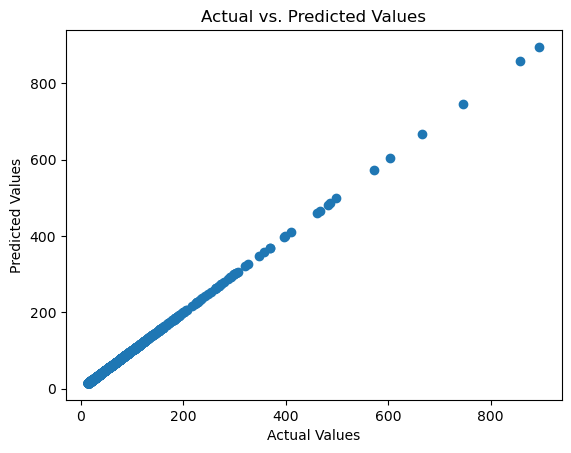

In [43]:
# Creating a scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


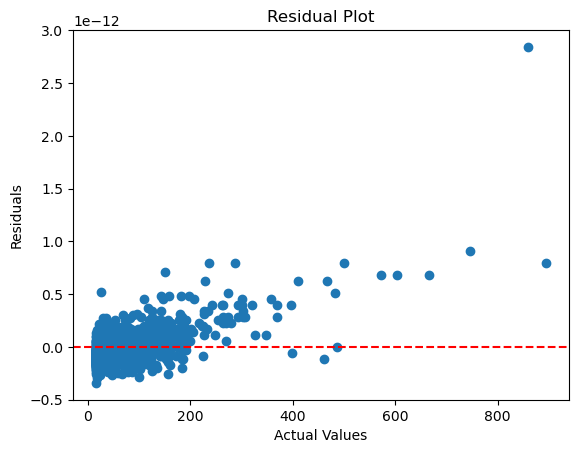

In [44]:
# Calculating residuals by subtracting predicted values from actual values
residuals = y_test - y_pred
# Creating a scatter plot of actual values vs. residuals
plt.scatter(y_test, residuals)
# Adding a horizontal line at y=0 to indicate zero residuals
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
